In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [4]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [6]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [10]:
dataiter = iter(trainloader)

In [11]:
images, labels = dataiter.next()

In [12]:
labels

tensor([1, 5, 6, 8])

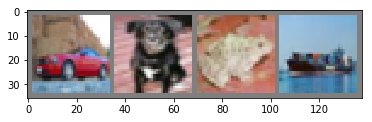

In [13]:
imshow(torchvision.utils.make_grid(images))

In [14]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  car   dog  frog  ship


In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [17]:
net = Net()

In [18]:
import torch.optim as optim

In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
for epoch in range(2):
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.230
[1,  4000] loss: 1.869
[1,  6000] loss: 1.692
[1,  8000] loss: 1.613
[1, 10000] loss: 1.545
[1, 12000] loss: 1.493
[2,  2000] loss: 1.420
[2,  4000] loss: 1.396
[2,  6000] loss: 1.384
[2,  8000] loss: 1.374
[2, 10000] loss: 1.345
[2, 12000] loss: 1.322
Finished Training


In [22]:
dataiter = iter(testloader)

In [23]:
images, labels = dataiter.next()

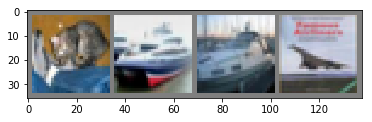

In [24]:
imshow(torchvision.utils.make_grid(images))

In [25]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  cat  ship  ship plane


In [26]:
outputs = net(images)

In [27]:
_, predicted = torch.max(outputs, 1)

In [28]:
print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   cat  ship   car  ship


In [29]:
correct = 0
total = 0

In [33]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy: %d %%' % (100*correct/total))

Accuracy: 51 %


In [34]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 51 %
Accuracy of  bird : 16 %
Accuracy of   cat : 62 %
Accuracy of  deer : 43 %
Accuracy of   dog : 31 %
Accuracy of  frog : 59 %
Accuracy of horse : 56 %
Accuracy of  ship : 65 %
Accuracy of truck : 64 %


In [35]:
for epoch in range(2):
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.250
[1,  4000] loss: 1.258
[1,  6000] loss: 1.219
[1,  8000] loss: 1.219
[1, 10000] loss: 1.214
[1, 12000] loss: 1.236
[2,  2000] loss: 1.129
[2,  4000] loss: 1.138
[2,  6000] loss: 1.134
[2,  8000] loss: 1.147
[2, 10000] loss: 1.117
[2, 12000] loss: 1.122
Finished Training


In [36]:
correct = 0
total = 0

In [38]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy: %d %%' % (100*correct/total))

Accuracy: 59 %
